**временные ряды и модели ARIMA**

Евгений Борисов <esborisov@sevsu.ru>

-----

Дмитрий Макаров   Временные ряды.    
https://www.dmitrymakarov.ru/intro/time-series-20/

Евгений Рябенко Прогнозирование временных рядов.     
https://www.youtube.com/watch?v=u433nrxdf5k

-----

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import pandas as pd
#from tqdm.auto import tqdm
#tqdm.pandas()
np.set_printoptions(precision=2)

---

AirPassengers.csv

https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view?usp=share_link

https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv

In [2]:
# читаем данные
url = 'https://huggingface.co/spaces/Anniek/Time_series_forecast/raw/main/AirPassengers.csv'
df = pd.read_csv(url).convert_dtypes()
display(len(df))
display(df.info())
display(df.describe().T)

144

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    string
 1   #Passengers  144 non-null    Int64 
dtypes: Int64(1), string(1)
memory usage: 2.5 KB


None

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [3]:
df['dt'] = pd.to_datetime(df['Month'])
df = df.set_index('dt')
df = df[['#Passengers']]

display(df.sample(3))

,#Passengers
dt,
1951-10-01,162
1956-06-01,374
1952-06-01,218


In [4]:
# fig,ax = plt.subplots(figsize = (9,3))
# ax.plot(df, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
# ax.set_xlabel('Месяцы', )
# ax.set_ylabel('Количество пассажиров',)
# ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
# # ax.legend(title = '', loc = 'upper left', )
# ax.grid()

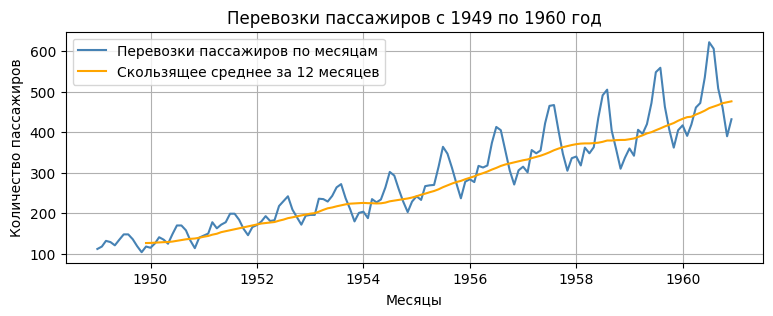

In [5]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(df, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
ax.plot(df.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()

-----

In [6]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 1959 года включительно
train = df[:'1959-12']

# тестовая выборка начнется с января 1960 года (по сути, один год)
test = df['1960-01':]

# автоматический подбор параметров модели ARIMA

In [7]:
# !pip install pmdarima

In [8]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima

# настроим поиск параметров на обучающей выборке
model_ = auto_arima(
        train, 
        start_p=1, 
        start_q=1,
        max_p=3, 
        max_q=3, 
        m=12, 
        start_P=0,
        seasonal=True,
        d=None, 
        D=1, 
        trace=True, 
        error_action ='ignore', 
        suppress_warnings = True,  
        stepwise = True
    )           

# выведем результат
print(model_.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=907.364, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.46 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.21 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.05 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.15 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [9]:
# train

In [10]:
# тестовый прогнозный период начнется с конца обучающего периода
# и закончится в конце тестового

n_periods = 12*2 # прогноз в месяцах
predicted = model_.predict( start=len(train), n_periods=n_periods)

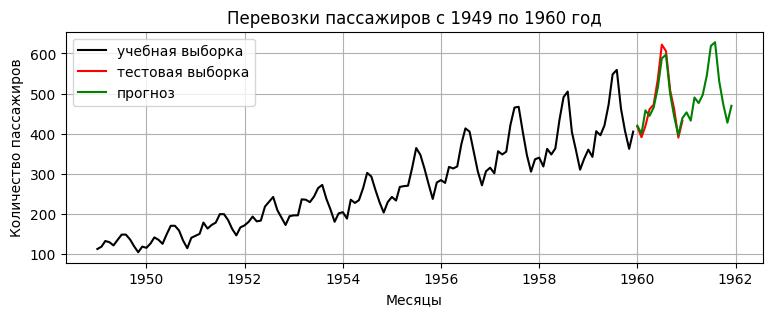

In [11]:
fig,ax = plt.subplots(figsize = (9,3))
ax.plot(train, color = 'black',label='учебная выборка')
ax.plot(test, color = 'red',label='тестовая выборка')
ax.plot(predicted, color = 'green',  label='прогноз')

ax.set_xlabel('Месяцы', )
ax.set_ylabel('Количество пассажиров',)
ax.set_title('Перевозки пассажиров с 1949 по 1960 год', )
ax.legend(title = '', loc = 'upper left', )
ax.grid()